<a href="https://colab.research.google.com/github/NomNomNarang/DeepLearning/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras


In [2]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

In [7]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [8]:
x_train=x_train/255
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [9]:
x_test=x_test/255
x_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [10]:
model=keras.Sequential([
    #cnn
keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    #flatten
    keras.layers.Flatten(),

    #dense
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])




/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=10)



Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 44ms/step - accuracy: 0.3707 - loss: 1.7068
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.6007 - loss: 1.1341
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 44ms/step - accuracy: 0.6668 - loss: 0.9645
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.6962 - loss: 0.8838
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.7179 - loss: 0.8080
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.7378 - loss: 0.7527
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.7587 - loss: 0.6968
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.7714 - loss: 0.6588
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7842 - loss: 0.6155
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.8007 - loss: 0.5695


In [16]:
y_predict=model.predict(x_test)
y_predict
y_predict=np.argmax(y_predict,axis=1)
y_predict

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


array([3, 8, 8, ..., 2, 4, 7])

In [13]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [20]:
y_test[10]

array([0], dtype=uint8)

In [21]:
y_predict[10]

np.int64(4)

In [22]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.64      0.71      1000
           1       0.86      0.77      0.81      1000
           2       0.56      0.55      0.56      1000
           3       0.54      0.42      0.48      1000
           4       0.47      0.81      0.60      1000
           5       0.62      0.54      0.58      1000
           6       0.76      0.78      0.77      1000
           7       0.76      0.70      0.73      1000
           8       0.76      0.86      0.81      1000
           9       0.82      0.73      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000



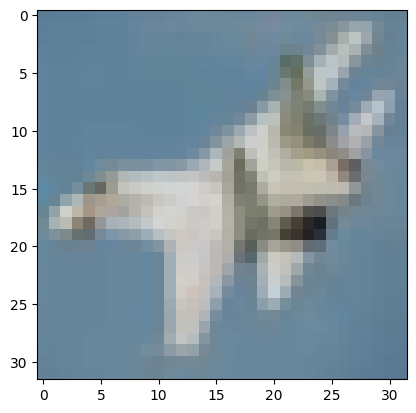

In [23]:
plt.imshow(x_test[10])

In [40]:
y_test[10]

array([0], dtype=uint8)

In [39]:
y_predict[10]

np.int64(4)

In [38]:
##classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [43]:
classes[0]==y_test[10]

array([False])

In [44]:
classes[0]==y_predict[10]

array([False])